In [6]:
import pymysql
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Conexión y consulta a MySQL
conn = pymysql.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    password='Grace07431*',
    database='accidentes_electricos'
)

cursor = conn.cursor()
cursor.execute("SELECT CENTRO_POBLADO, ANIO, TIPO_LESION FROM accidentes_de_origen_electrico")
data = cursor.fetchall()
column_names = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns=column_names)

cursor.close()
conn.close()

In [7]:
# Limpieza: eliminar filas con valores nulos
df.dropna(inplace=True)



In [8]:
# Codificar variables categóricas
le_zona = LabelEncoder()
le_tipo = LabelEncoder()

df['CENTRO_POBLADO'] = le_zona.fit_transform(df['CENTRO_POBLADO'])
df['TIPO_LESION'] = le_tipo.fit_transform(df['TIPO_LESION'])


# Dividir en variables X (predictoras) y y (objetivo)
X = df[['CENTRO_POBLADO', 'ANIO']]
y = df['TIPO_LESION']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [9]:
# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le_tipo.classes_))


Accuracy: 0.5333333333333333

Reporte de clasificación:
                precision    recall  f1-score   support

Conjuntivitis       0.00      0.00      0.00         1
    Derivadas       0.25      0.33      0.29         3
 Electrólisis       0.00      0.00      0.00         1
  Fibrilación       0.00      0.00      0.00         0
       Muerte       0.00      0.00      0.00         7
         Otra       0.37      0.59      0.45        17
   Quemaduras       0.78      0.63      0.70        62
 Tetanización       0.00      0.00      0.00         2
 Traumatismos       0.46      0.50      0.48        12

     accuracy                           0.53       105
    macro avg       0.21      0.23      0.21       105
 weighted avg       0.58      0.53      0.55       105



c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

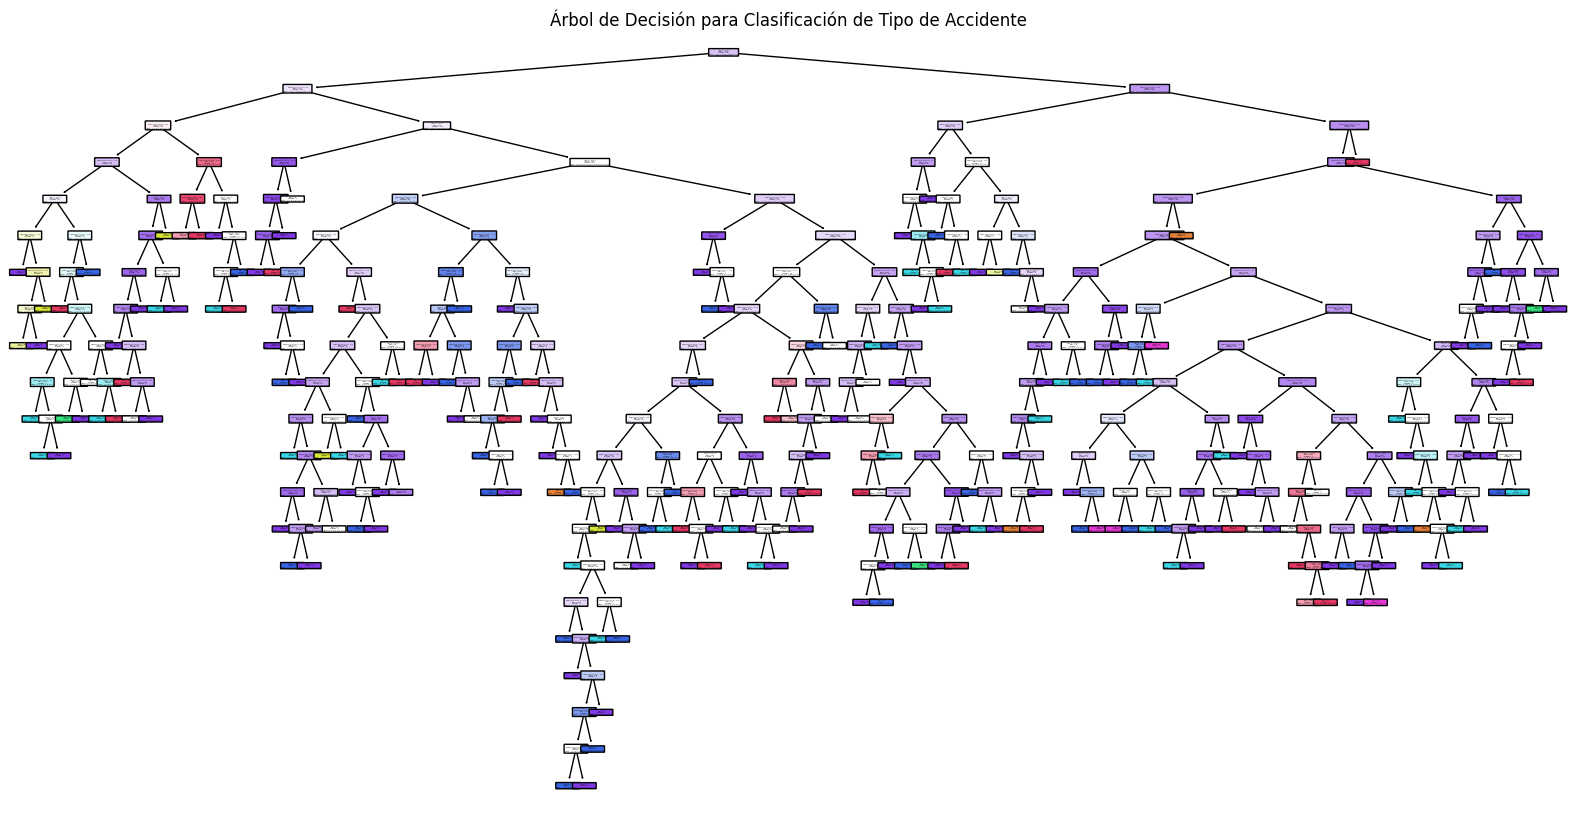

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))  # Ajusta el tamaño del gráfico si es necesario
plot_tree(clf, 
          feature_names=['CENTRO_POBLADO', 'ANIO'], 
          class_names=le_tipo.classes_, 
          filled=True, 
          rounded=True)
plt.title("Árbol de Decisión para Clasificación de Tipo de Accidente")
plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Entrenar el árbol con max_depth=4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

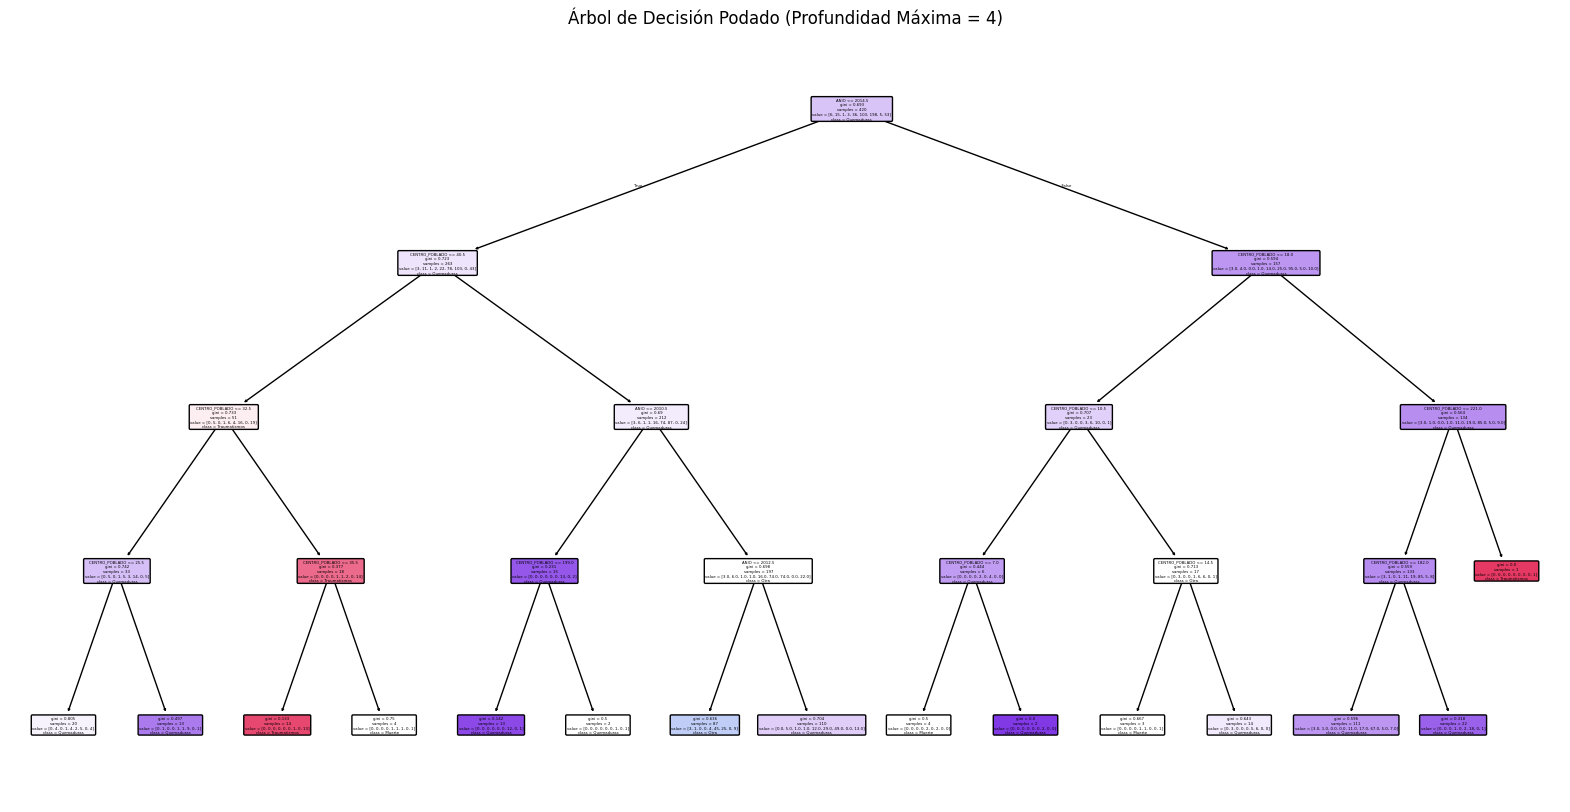

In [15]:
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=['CENTRO_POBLADO', 'ANIO'],
          class_names=le_tipo.classes_,
          filled=True,
          rounded=True)

plt.title("Árbol de Decisión Podado (Profundidad Máxima = 4)")
plt.show()


In [25]:
from sklearn.utils.multiclass import unique_labels

# Obtener las etiquetas presentes en y_test e y_pred_podado
etiquetas_presentes = unique_labels(y_test, y_pred_podado)

# Mostrar reporte solo con esas etiquetas
print("\nReporte de clasificación (podado):\n", classification_report(
    y_test, y_pred_podado, labels=etiquetas_presentes,
    target_names=le_tipo.inverse_transform(etiquetas_presentes)
))



Reporte de clasificación (podado):
                precision    recall  f1-score   support

Conjuntivitis       0.00      0.00      0.00         1
    Derivadas       0.00      0.00      0.00         3
 Electrólisis       0.00      0.00      0.00         1
       Muerte       0.00      0.00      0.00         7
         Otra       0.32      0.47      0.38        17
   Quemaduras       0.70      0.85      0.77        62
 Tetanización       0.00      0.00      0.00         2
 Traumatismos       1.00      0.33      0.50        12

     accuracy                           0.62       105
    macro avg       0.25      0.21      0.21       105
 weighted avg       0.58      0.62      0.57       105



c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,